# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.109213e+01     8.467550e+00
 * time: 0.0019330978393554688
     1     2.930052e+01     5.385803e+00
 * time: 0.006306171417236328
     2     1.958387e+01     4.529353e+00
 * time: 0.010528087615966797
     3     1.436660e+01     4.490235e+00
 * time: 0.014611959457397461
     4     1.100498e+01     1.582796e+00
 * time: 0.01869797706604004
     5     9.244646e+00     1.014137e+00
 * time: 0.022643089294433594
     6     8.751134e+00     9.291801e-01
 * time: 0.025889158248901367
     7     8.498645e+00     6.126420e-01
 * time: 0.029246091842651367
     8     8.271377e+00     5.515926e-01
 * time: 0.032495975494384766
     9     8.122419e+00     4.477239e-01
 * time: 0.03588509559631348
    10     8.041874e+00     3.450013e-01
 * time: 0.03938102722167969
    11     7.990343e+00     3.956953e-01
 * time: 0.04278206825256348
    12     7.965957e+00     5.486333e-01
 * time: 0.04718303680419922
    13     7.931090e+00     5.155804e-01

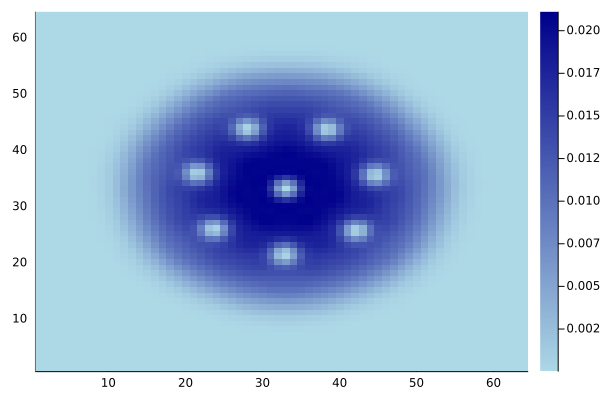

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)